I worked on this problem back when it was the current problem, during my last few weeks at my internship, as a way to procrastinate on my work. The problem was that I decided I didn't want to use a computer, so I integrated the function BY HAND (boy was I humbled). I spent multiple days submitting different solutions and checking the leaderboard to see if I was right. I found out after they released the solution that my initial solution was correct, but I forgot to divide by two somewhere...

**Problem:** Two robots, Aaron and Erin, have made it to this year’s final! Initially they are situated at the center of a unit circle. A flag is placed somewhere inside the circle, at a location chosen uniformly at random. Once the flag is placed, Aaron is able to deduce its distance to the flag, and Erin is only able to deduce its direction to the flag. (Equivalently: if (r, θ) are the polar coordinates of the flag’s location, Aaron is told r and Erin is told θ.)

Both robots are allowed to make a single move after the flag is placed, if they wish. Any move they make is without knowledge of what the other robot is doing. (And they may not move outside the circle.)

Whichever robot is closer to the flag after these moves captures the flag and is declared the winner!

During the preliminaries it was discovered that Erin is programmed to play a fixed distance along the detected angle θ. Assuming otherwise optimal play by both robots, can you determine the probability that Aaron will win? (Please express your answer to 10 decimal places.)

Let the fixed distance Erin plays be $r$, and let the flag's distance from the center be $R$. The PDF of $R$ is $2R$, since the area of a circle grows quadratically in proportion to $R$. We will integrate the probability Aaron wins times the PDF, express that probability in terms of Erin's optimal play of $r$, then find the $r$ that minimizes Aaron's probability of winning.

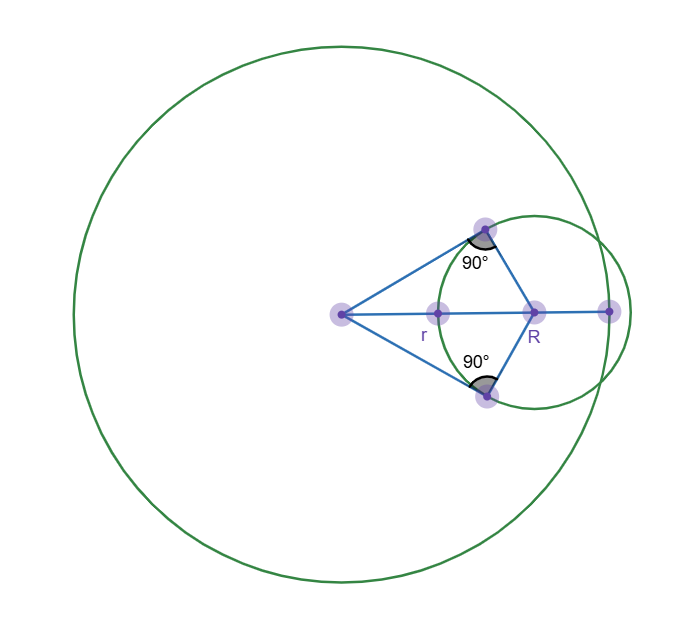

For now, assume that $R > r/2$. The probability of winning is the angle formed by the location of the robot, the center, and the tangency line between the center and the circle of radius $|R - r|$ centered at the robot's location, divided by $\pi$ radians. This maximizes the angle that Aaron needs to hit. 

This also imples Aaron needs to make a random guess equal to the length $\sqrt{R^2 - (R - r)^2}$. This further implies Aaron's guess will never be outside the unit circle, since this expression is at most 1.

To provide more of an explanation, the smaller circle represents the area in which Aaron's guess will beat Erin's guess. Since Aaron has no idea what angle the flag is at, Aaron can only randomly pick an angle and give an optimal number that will beat Erin's guess. This is under the assumption that Aaron has figured out what Erin's fixed distance is, which we will get to later. Since Aaron is essentially guessing a random on a 360-degree arc some distance away from the center of the unit circle, we want as much of that arc to lie within the smaller circle in the diagram as possible, to increase the chance Aaron beats Erin. The arc of radius equal to the tangency line shown in the diagram maximizes that portion of the arc (consider the biggest angle that can be formed by the two centers and a point on the circumference of the winning boundary).

If $R < r/2$, then Aaron has a guaranteed guess; not moving at all. The probability of Aaron winning in such a case is $1$.

If $r > R > r/2$, then the probability of Aaron winning is $\frac{\arcsin((r - R) / R)}{\pi}$. If $R > r$, then the probability is $\frac{\arcsin((R - r) / R)}{\pi}$.

In [8]:
from numpy import arcsin
from numpy import pi
import scipy.integrate as integrate

def prob_aaron_wins(r):
    guaranteed_win_prob = (r / 2) ** 2
    R_less_r_prob = lambda R: arcsin((r - R) / R) * 2 * R / pi 
    R_more_r_prob = lambda R: arcsin((R - r) / R) * 2 * R / pi
    R_less_r_prob = integrate.quad(R_less_r_prob, r / 2, r)[0]
    R_more_r_prob = integrate.quad(R_more_r_prob, r, 1)[0]
    return R_less_r_prob + R_more_r_prob + guaranteed_win_prob

from scipy.optimize import minimize
minimize(
    fun=prob_aaron_wins,
    x0=(0.5,),
    bounds=((0, 1),),
    method='L-BFGS-B',
    options={'ftol': 1e-20, 'gtol': 1e-20, 'maxiter': 100000000}
)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.16618648647400852
        x: [ 5.013e-01]
      nit: 3
      jac: [ 0.000e+00]
     nfev: 8
     njev: 4
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

The answer only took three iterations! Having a good seed value is key

Quoting the Jane Street website:
    
"Numerically solving for the e that minimizes the probability above gives e ≈ 0.501306994212753; plugging that into the integral above gives P(Aaron wins) ≈ **0.166186486474004**."

Here is a man with many chins:

$:)))$